In [22]:
import pandas as pd
from matplotlib import pyplot as plt

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [42]:
df_observed = pd.read_excel("./data/validation/day_ahead_prices.xlsx", index_col=0)
df_observed = df_observed.drop(columns=['ALBE', 'ALDE'])
df_observed = df_observed[0:24*56]

df_forecast = pd.read_excel("price_forecast.xlsx")
df_forecast.index = df_observed.index

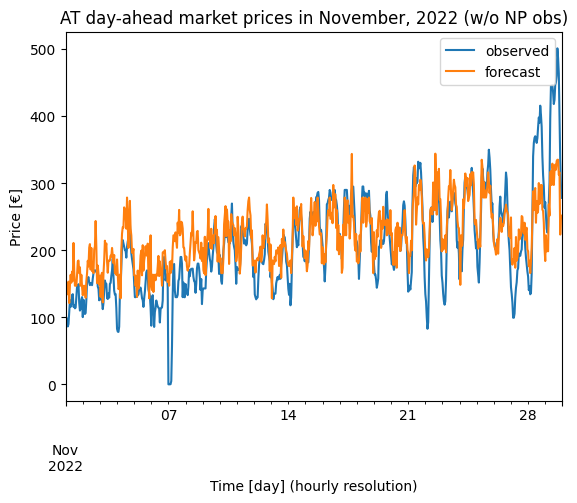

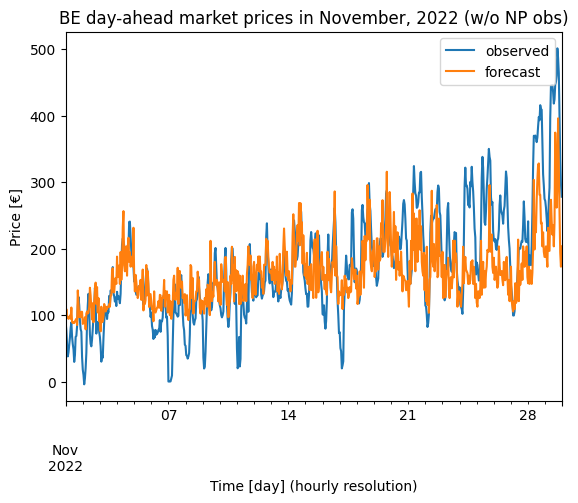

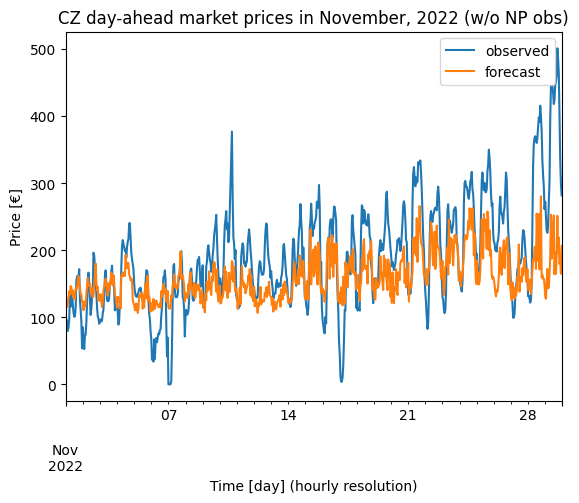

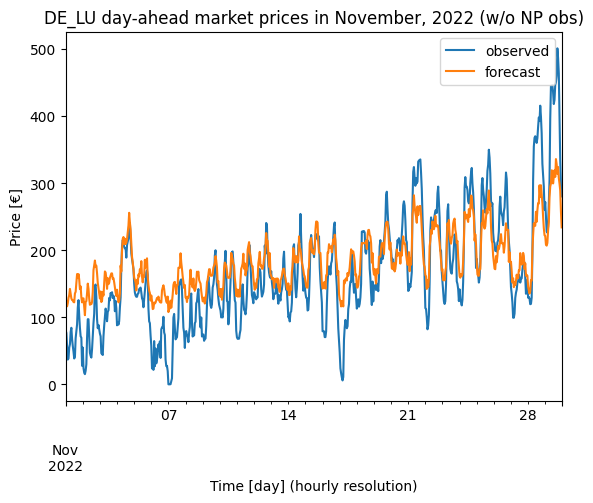

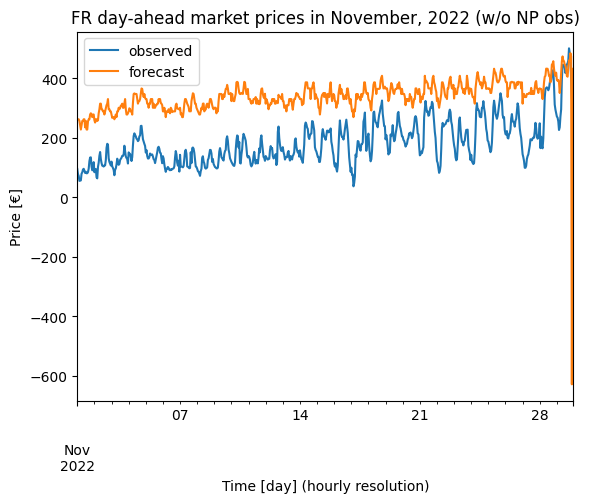

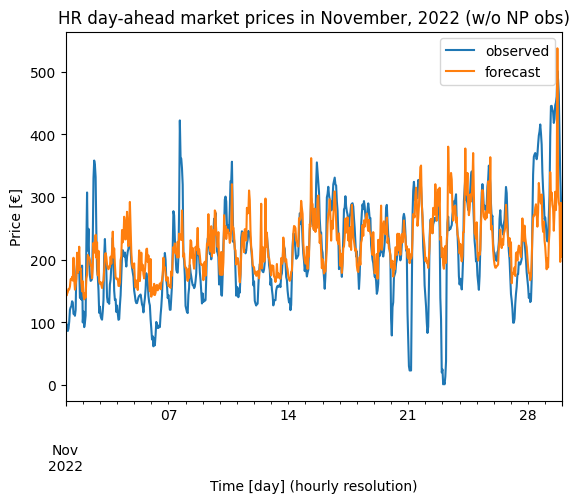

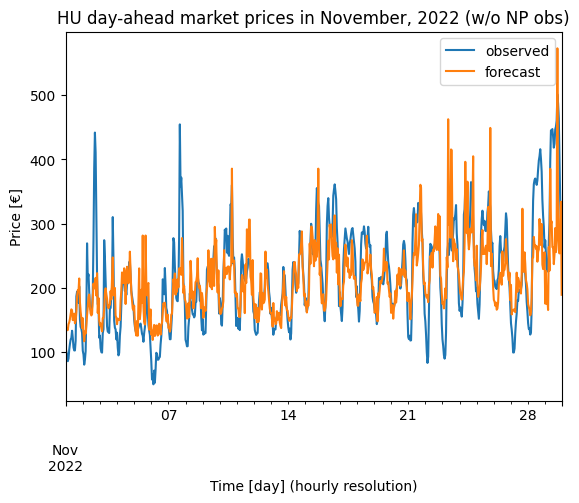

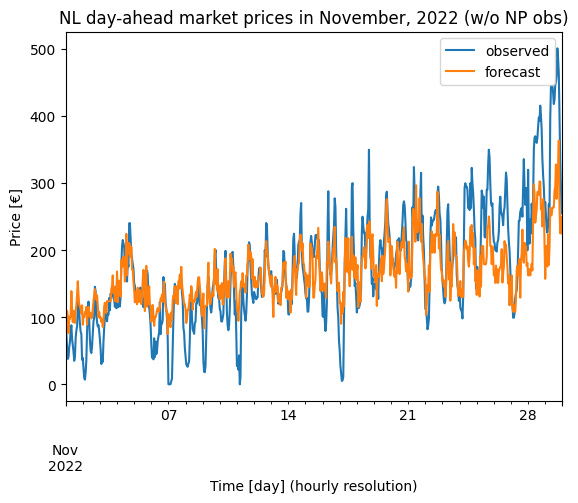

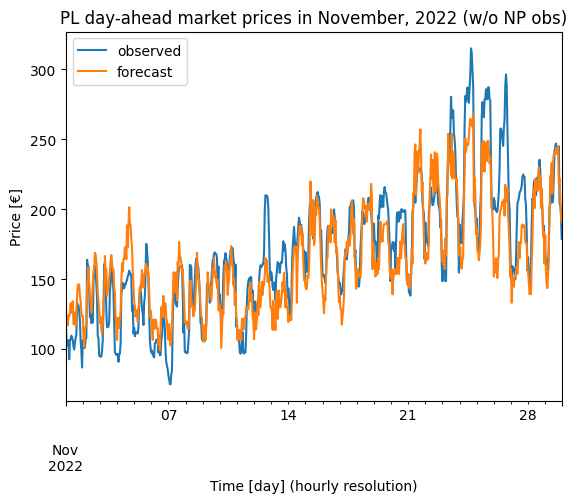

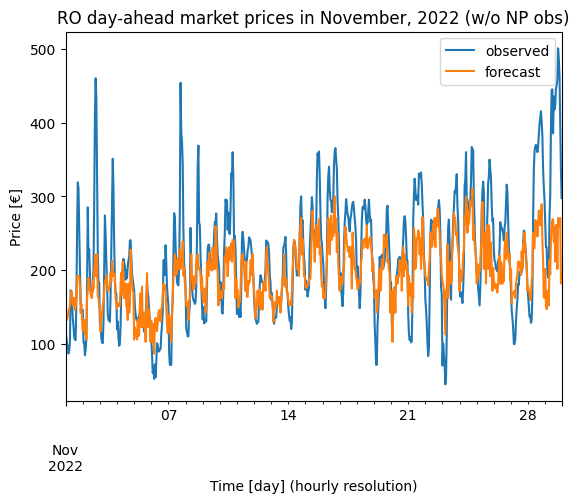

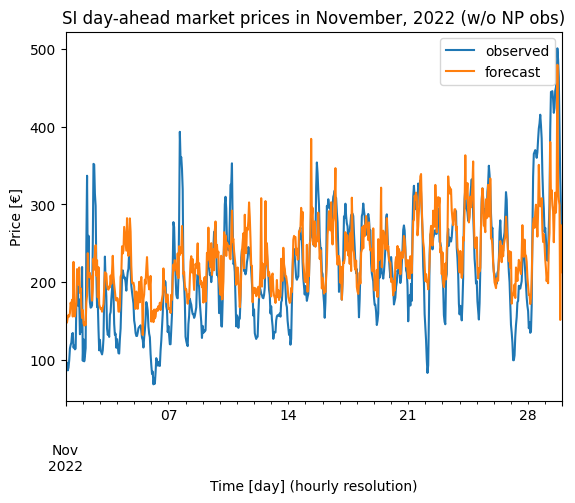

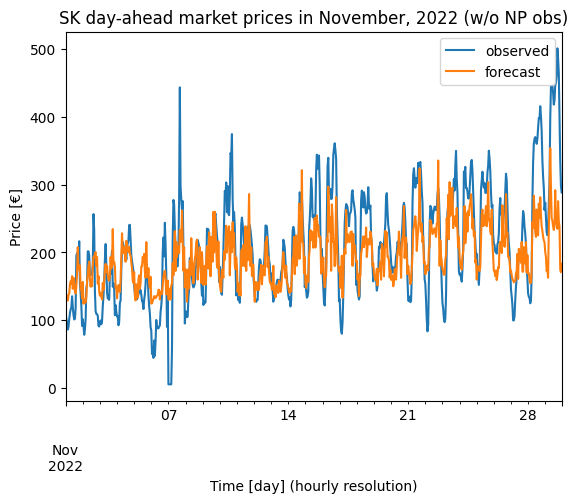

In [93]:
for zone in countries:
    ax = df_observed.iloc[0:24*29][zone].plot()
    df_forecast.iloc[0:24*29][zone].plot(ax=ax)
    plt.title("{0} day-ahead market prices in November, 2022 (w/o NP obs)".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'forecast'])
    plt.show()

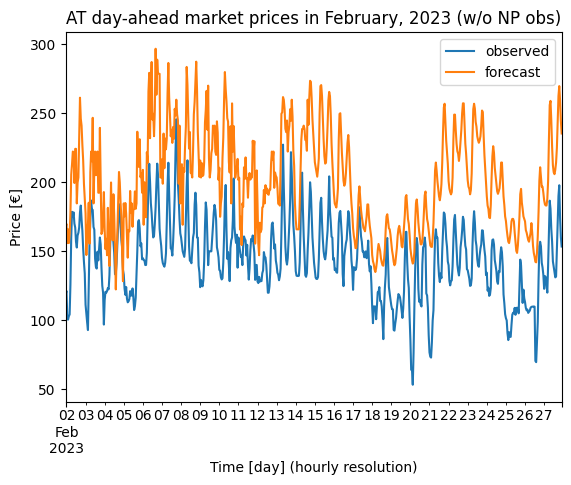

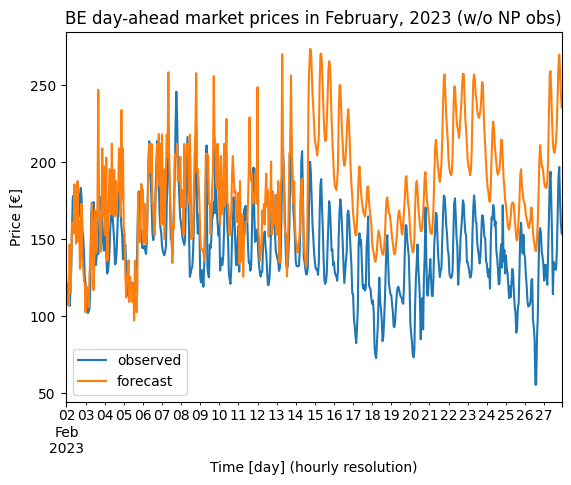

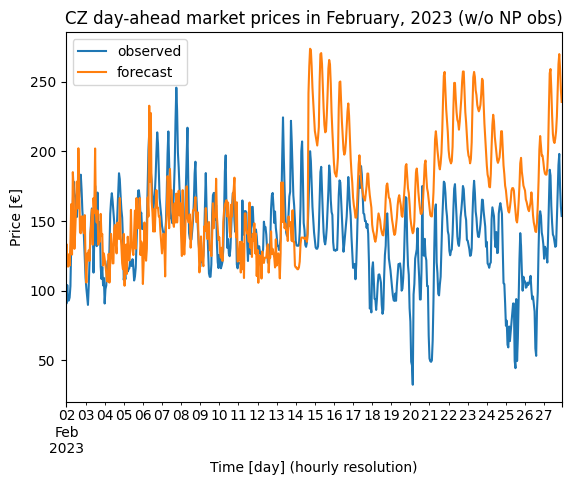

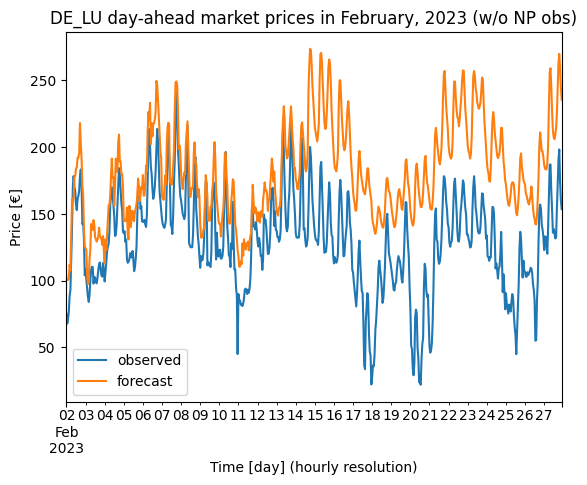

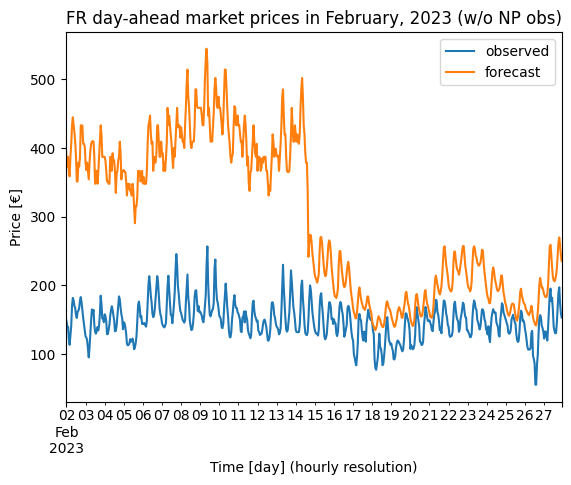

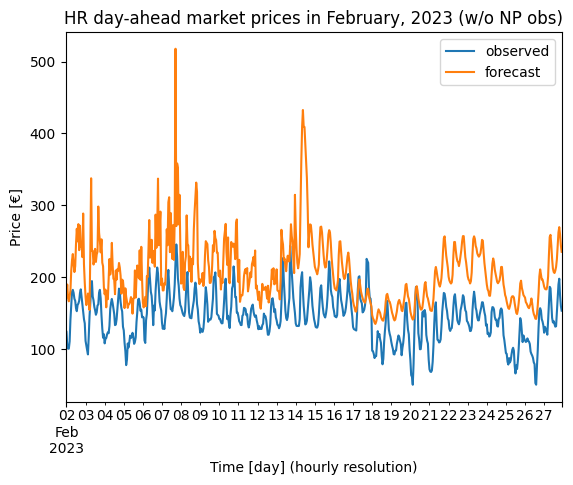

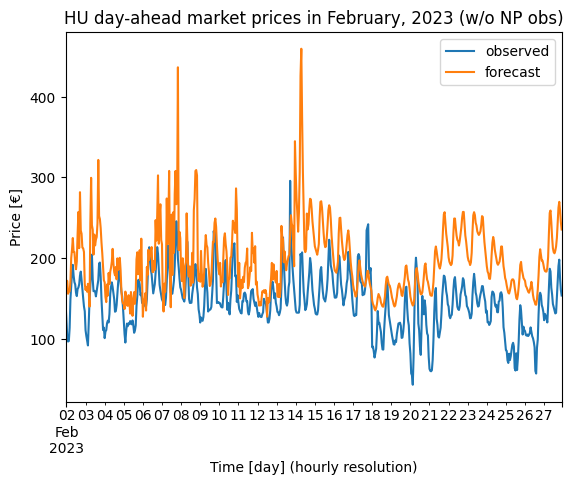

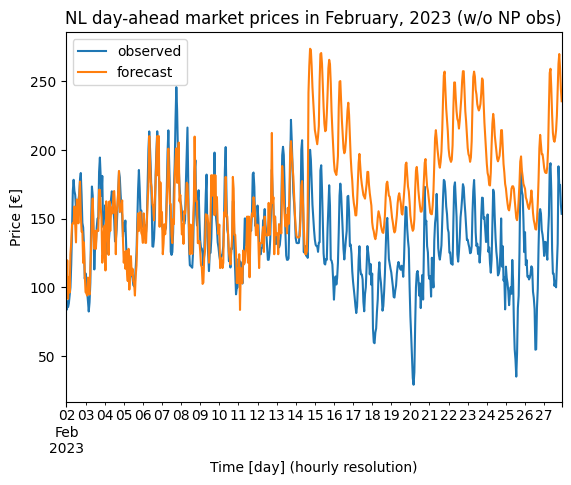

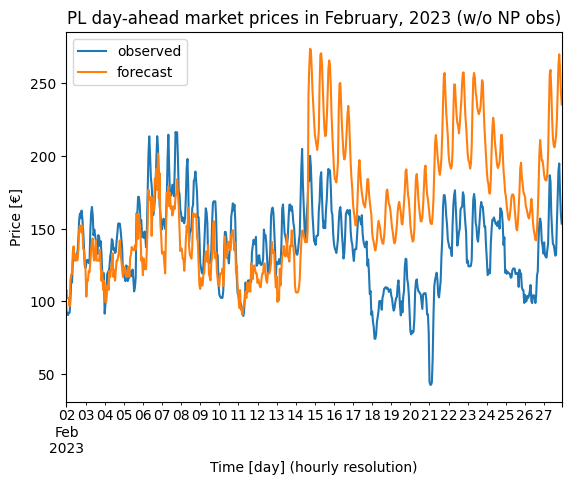

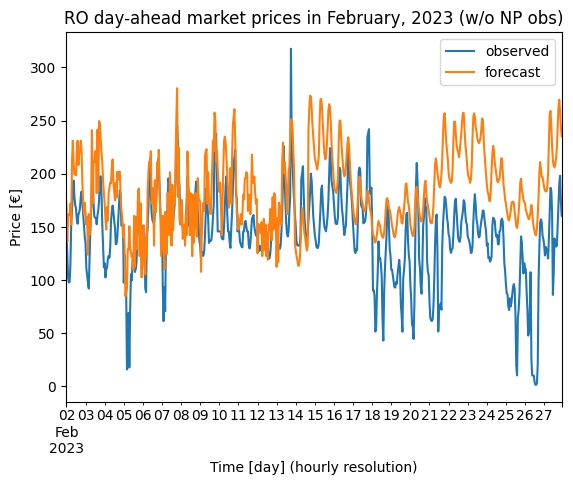

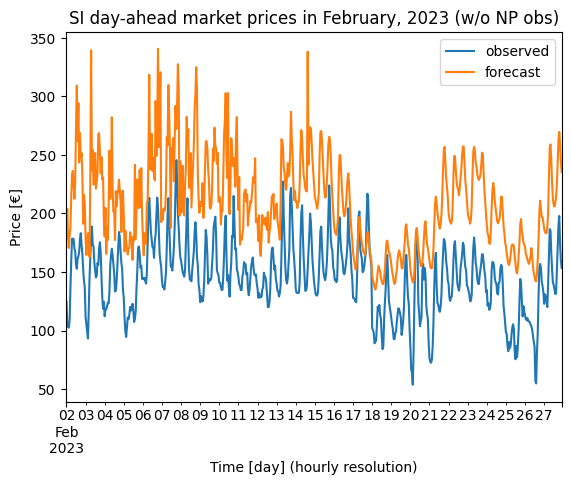

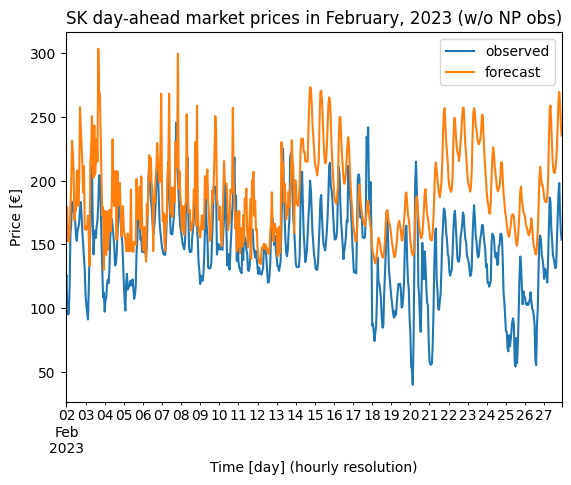

In [94]:
for zone in countries:
    ax = df_observed.iloc[24*30:24*56][zone].plot()
    df_forecast.iloc[24*30:24*56][zone].plot(ax=ax)
    plt.title("{0} day-ahead market prices in February, 2023 (w/o NP obs)".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'forecast'])
    plt.show()

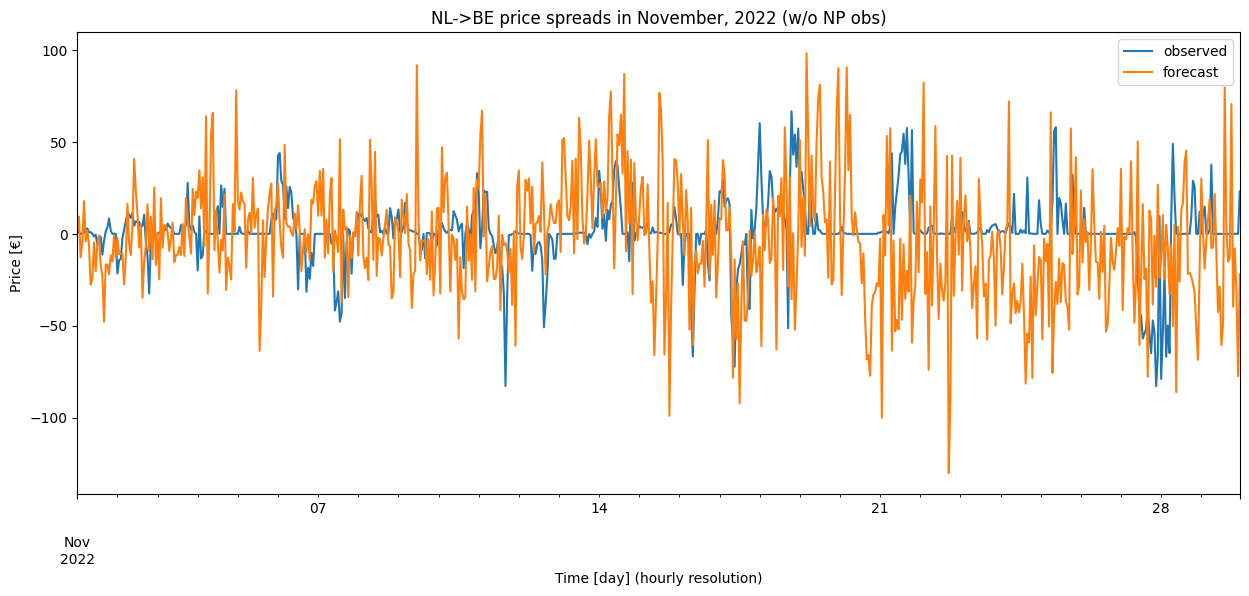

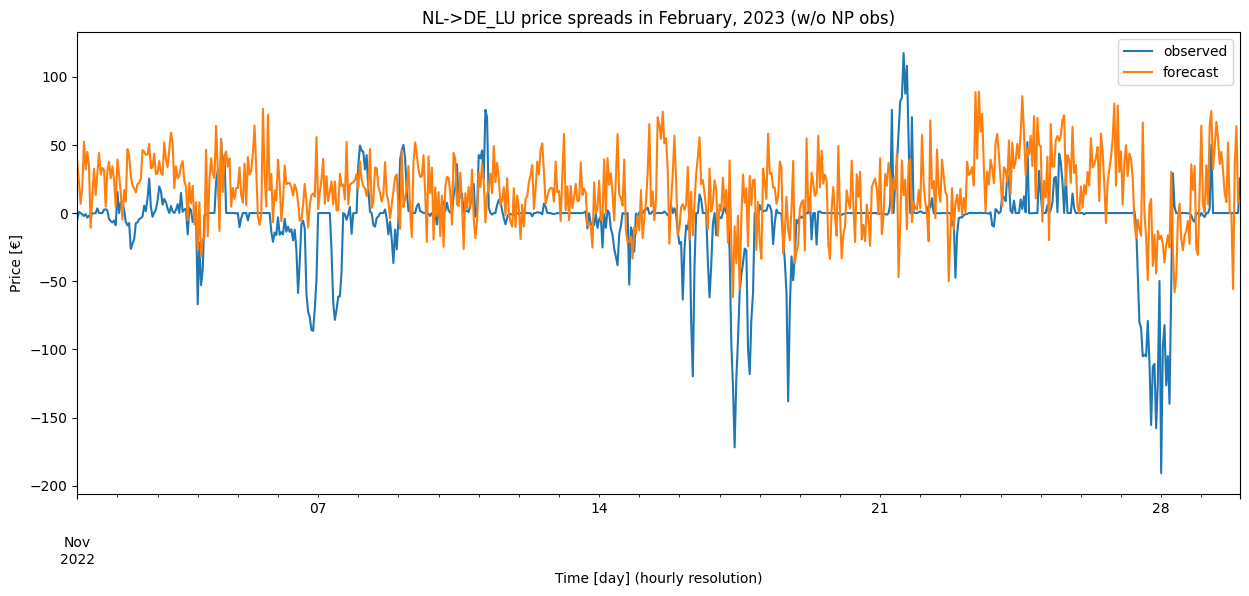

In [95]:
# price spreads

# NL-> BE
df_nl_be_observed = df_observed.iloc[0:24*29]['BE'] - df_observed.iloc[0:24*29]['NL'] 
df_nl_be_forecast = df_forecast.iloc[0:24*29]['BE'] - df_forecast.iloc[0:24*29]['NL'] 
plt.figure(figsize=(15,6))
ax = df_nl_be_observed.plot()
df_nl_be_forecast.plot(ax=ax)
plt.title("NL->BE price spreads in November, 2022 (w/o NP obs)")
plt.ylabel('Price [€]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast'])
plt.show()

# NL-> DE
df_nl_be_observed = df_observed.iloc[0:24*29]['DE_LU'] - df_observed.iloc[0:24*29]['NL'] 
df_nl_be_forecast = df_forecast.iloc[0:24*29]['DE_LU'] - df_forecast.iloc[0:24*29]['NL'] 
plt.figure(figsize=(15,6))
ax = df_nl_be_observed.plot()
df_nl_be_forecast.plot(ax=ax)
plt.title("NL->DE_LU price spreads in February, 2023 (w/o NP obs)")
plt.ylabel('Price [€]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast'])
plt.show()

In [96]:
df_errors = df_forecast.copy()
df_errors = df_errors - df_observed
df_errors = df_errors/df_forecast

Text(0.5, 0.98, 'Day-ahead market price forecast errors in November, 2022 (w/o NP obs)')

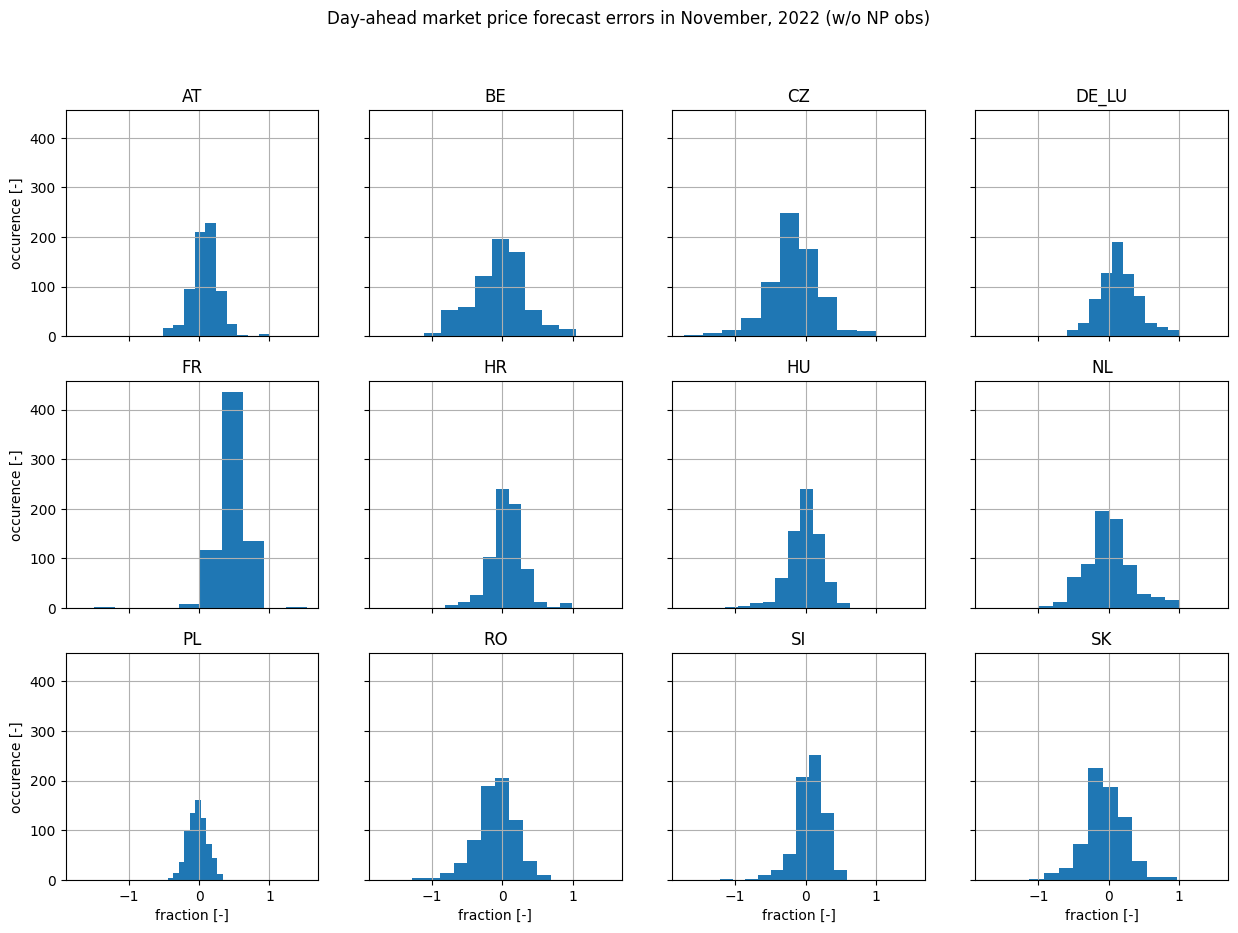

In [97]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    df_errors.iloc[0:24*29][zone].hist(ax=zone_axs[index])
    zone_axs[index].set_title(zone)
   
for ax in axs.flat:
    ax.set(xlabel='fraction [-]', ylabel='occurence [-]')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Day-ahead market price forecast errors in November, 2022 (w/o NP obs)')

Text(0.5, 0.98, 'Day-ahead market price relative forecast errors in February, 2023 (w/o NP obs)')

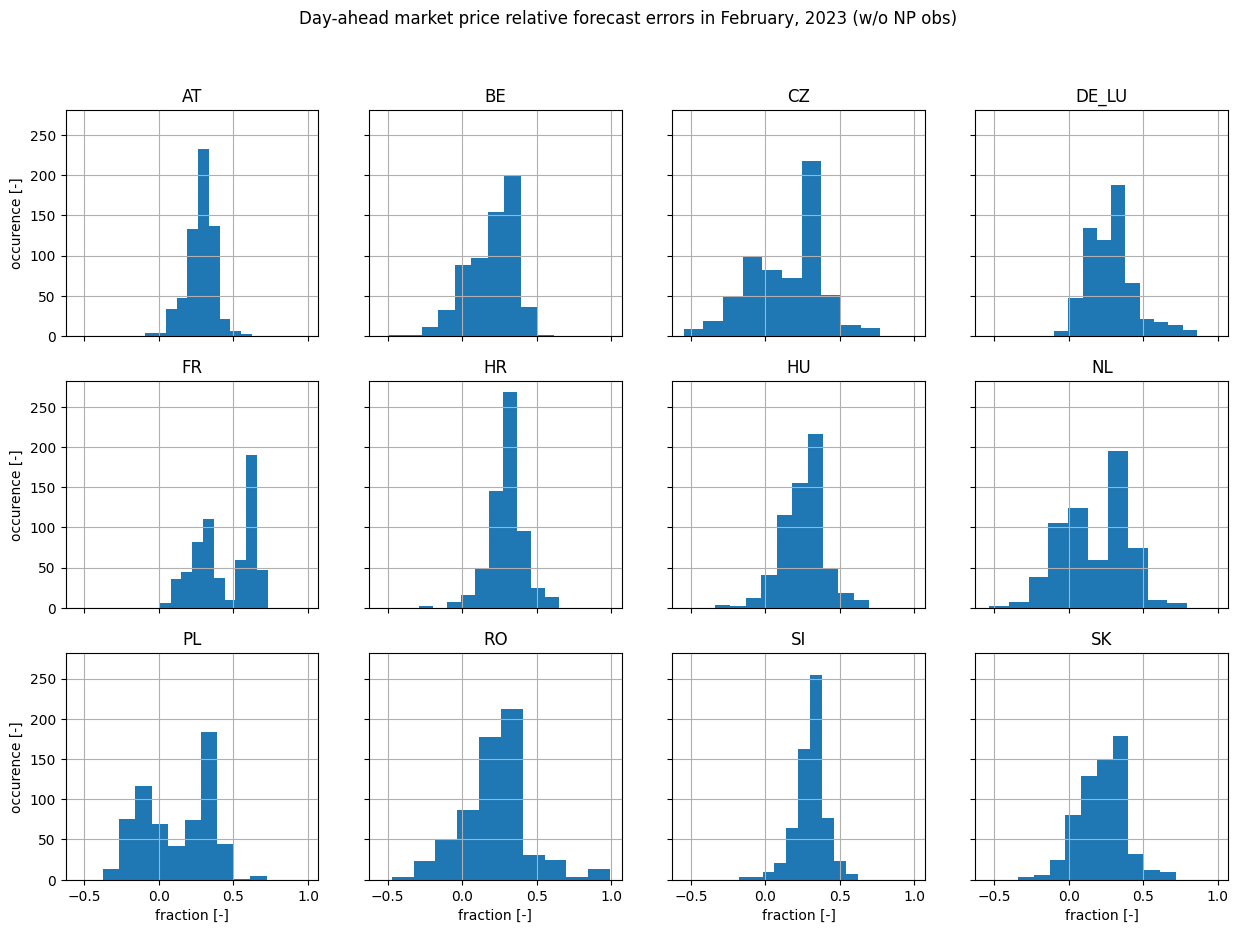

In [98]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    df_errors.iloc[24*30:24*56][zone].hist(ax=zone_axs[index])
    zone_axs[index].set_title(zone)
   
for ax in axs.flat:
    ax.set(xlabel='fraction [-]', ylabel='occurence [-]')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Day-ahead market price relative forecast errors in February, 2023 (w/o NP obs)')